# Data Preparation

In [2]:
#pip install shap

In [3]:
import numpy as np
import pandas as pd
import warnings
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import shap
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv("XYZloan_default_selected_vars.csv")

In [5]:
data.drop(['TD044','TD048','TD051','TD054','TD055','TD061','TD062','AP004','AP005','AP006','MB007'], axis=1, inplace=True)

In [6]:
# Missing value filling
for column in data.columns:
    # If the column is numeric, fill it with the median
    if pd.api.types.is_numeric_dtype(data[column]):
        median_val = data[column].median()
        data[column].fillna(median_val, inplace=True)

The top 10 variables from previous RF model are AP003, TD013, TD009, TD005, MB005, CR015, TD014, AP001, TD010, and TD001. Categorical variables have been encoded.

In [7]:
# Set features
predictors = ['AP003', 'TD013', 'TD009', 'TD005', 'MB005', 'CR015', 'TD014', 'AP001', 'TD010', 'TD001']

In [26]:
predictors

['AP003',
 'TD013',
 'TD009',
 'TD005',
 'MB005',
 'CR015',
 'TD014',
 'AP001',
 'TD010',
 'TD001']

In [8]:
# Set target variable
target='loan_default'

In [9]:
train, test = train_test_split(data, test_size=0.2, random_state=42)

In [10]:
train['loan_default'].value_counts(dropna=False)

loan_default
0    51662
1    12338
Name: count, dtype: int64

# Random Forest

In [11]:
rf_model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
rf_model.fit(train[predictors], train[target])

RandomForestRegressor(max_depth=6, n_estimators=10, random_state=0)

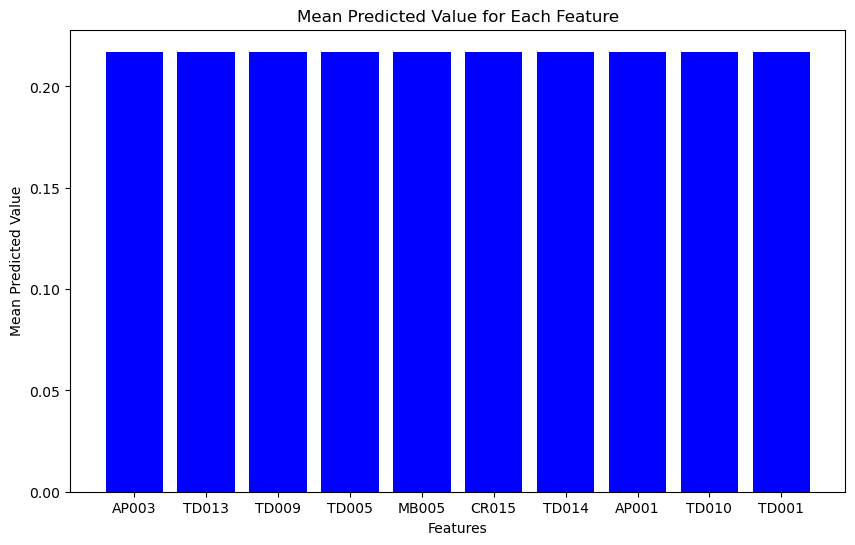

In [21]:
import matplotlib.pyplot as plt

# Your data (replace this with your actual dataset)
data = {
    'AP003': [3, 3, 4, 1, 3, 3, 1],
    'TD013': [12, 5, 12, 22, 18, 2, 15],
    'TD009': [7, 5, 7, 15, 15, 2, 5],
    'TD005': [4, 4, 3, 5, 12, 2, 2],
    'MB005': [8.0, 7.0, 14.0, 3.0, 3.0, 5.0, 2.0],
    'CR015': [5, 5, 6, 5, 6, 6, 6],
    'TD014': [2, 1, 5, 6, 7, 0, 8],
    'AP001': [33, 31, 37, 22, 31, 33, 29],
    'TD010': [1, 0, 2, 3, 6, 0, 4],
    'TD001': [2, 2, 3, 3, 5, 0, 1],
    'predict': [0.21, 0.13, 0.12, 0.37, 0.28, 0.08, 0.33]
}

df = pd.DataFrame(data)

# Calculate mean predicted values
mean_predicted_values = df['predict'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(df.columns[:-1], mean_predicted_values, color='blue')
plt.xlabel('Features')
plt.ylabel('Mean Predicted Value')
plt.title('Mean Predicted Value for Each Feature')
plt.show()


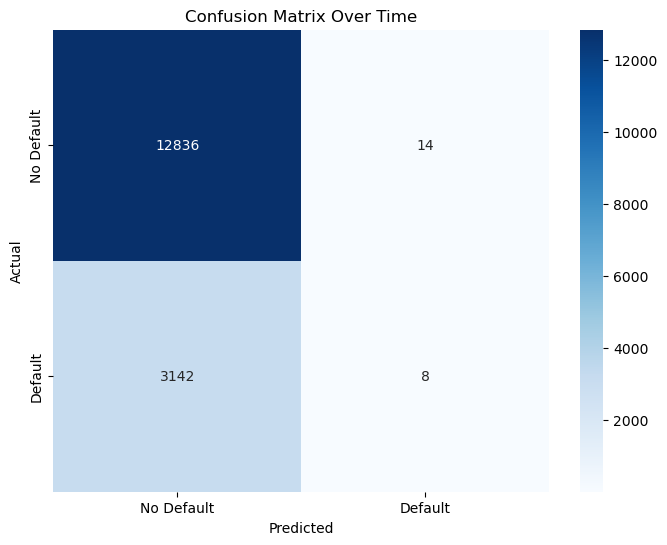

In [17]:
import numpy as np  # Add this import statement
from sklearn.metrics import confusion_matrix

# ... (previous code)

# Visualization 4: Confusion Matrix Over Time (Figure V)
plt.figure(figsize=(8, 6))
# Ensure you import confusion_matrix from sklearn.metrics
cm = confusion_matrix(test['loan_default'], np.round(rf_model.predict(test[predictors])))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.title('Confusion Matrix Over Time')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ... (remaining code)


In [18]:

# Visualization 5: System Performance Metrics
# (Assuming you have a DataFrame named 'system_metrics' containing CPU, memory, disk, network I/O, etc.)
plt.figure(figsize=(12, 6))
for metric in system_metrics.columns:
    sns.lineplot(data=system_metrics, x=system_metrics.index, y=metric, label=metric)
plt.title('System Performance Metrics Over Time')
plt.xlabel('Time')
plt.ylabel('Metric Value')
plt.legend()
plt.show()

NameError: name 'system_metrics' is not defined

<Figure size 1200x600 with 0 Axes>

# Summary Plot

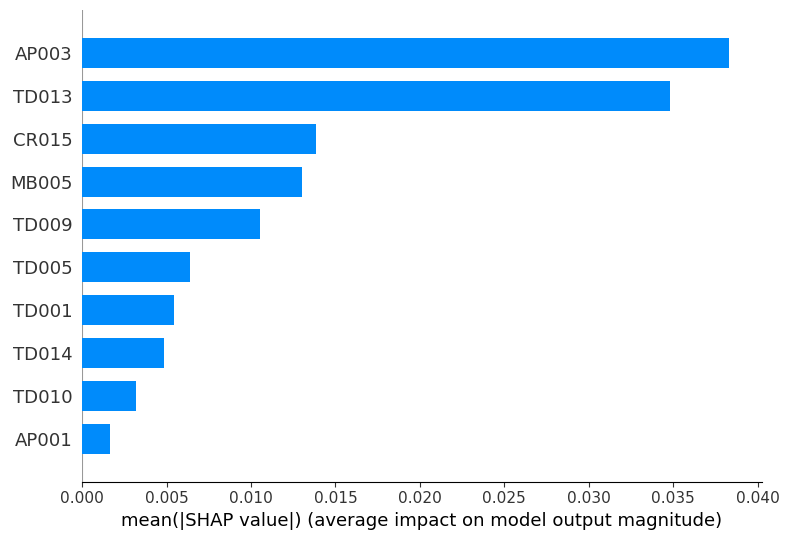

In [19]:
shap_values_dt = shap.TreeExplainer(rf_model).shap_values(train[predictors])
shap.summary_plot(shap_values_dt, train[predictors], plot_type="bar")

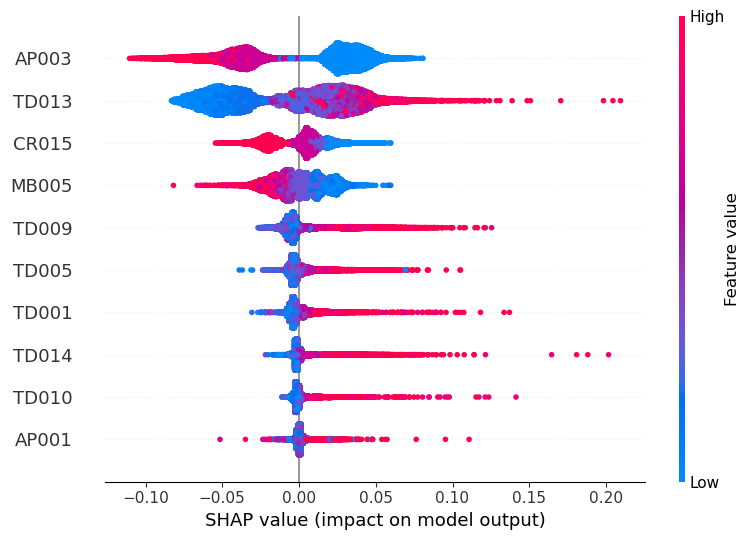

In [20]:
shap.summary_plot(shap_values_dt, train[predictors])

# Interpretation on Summary Plot
1. Feature importance: Variables are ranked in descending order. "AP003" appears to be most important feature in this case with a mean shap value of approximately 0.040. "AP001"a ppears to be the least important feature with a mean shap value of approximately 0.002.
2. Impact and correlation: The horizontal location shows whether the effect of that value is associated with a higher or lower prediction. "AP003" shows the effect of higher feature value associated with a lower shap value, lower prediction. "TD013" shows the effect of higher feature value associated with a higher shap value, resulting in higher prediction, and so on.
3. Original value: Color shows whether that variable is high (in red) or low (in blue) for that observation.

# Dependence Plot

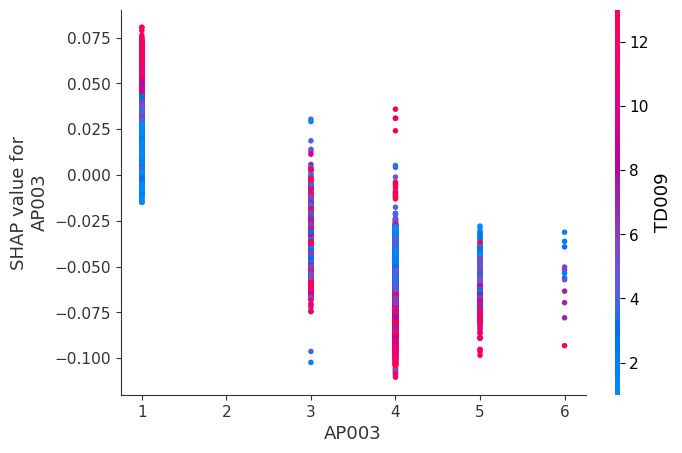

In [19]:
shap.dependence_plot('AP003', shap_values_dt, train[predictors])

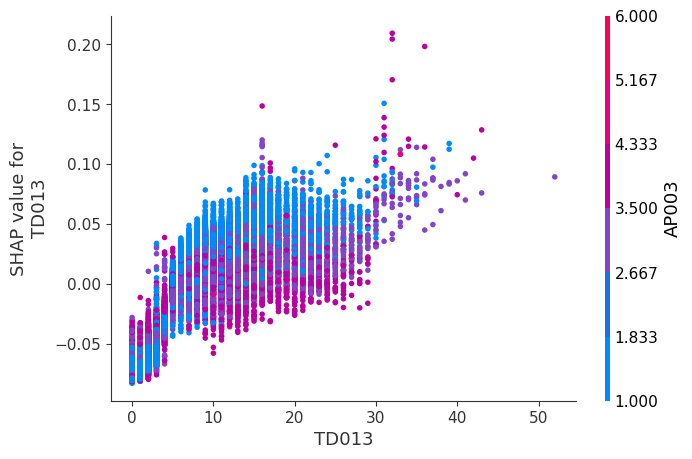

In [20]:
shap.dependence_plot('TD013', shap_values_dt, train[predictors])

# Interpretation of Dependence Plot

1. A partial dependence plot shows the marginal effect of one or two features on the predicted outcome of a machine learning model (J. H. Friedman 2001). It tells whether the relationship between the target and a feature is linear, monotonic or more complex.
2. The first dependence plot shows there is an approximately linear and positive trend between “AP003” and the target variable, and “AP003” interacts with “TD009” frequently.
3. The second dependence plot shows there exists an approximately linear and positive relationship between “TD013” and the target variable. This positive relationship is already demonstrated in the variable importance plot.



In [21]:
# Get the predictions and put them with the test data.
X_output = test[predictors].copy()
X_output.loc[:,'predict'] = np.round(rf_model.predict(X_output),2)

# Randomly pick some observations
random_picks = np.arange(1,330,50) # Every 50 rows
S = X_output.iloc[random_picks]
S

,AP003,TD013,TD009,TD005,MB005,CR015,TD014,AP001,TD010,TD001,predict
44295,3,12,7,4,8.0,5,2,33,1,2,0.21
49540,3,5,5,4,7.0,5,1,31,0,2,0.13
28098,4,12,7,3,14.0,6,5,37,2,3,0.12
17370,1,22,15,5,3.0,5,6,22,3,3,0.37
70891,3,18,15,12,3.0,6,7,31,6,5,0.28
39087,3,2,2,2,5.0,6,0,33,0,0,0.08
41320,1,15,5,2,2.0,6,8,29,4,1,0.33


Interpretation:

Observation 44295:
- AP003: 3
- TD013: 12
- TD009: 7
- TD005: 4
- MB005: 8.0
- CR015: 5
- TD014: 2
- AP001: 33
- TD010: 1
- TD001: 2
- predict: 0.21

This suggests that for the input features represented by the values in columns AP003 through TD001, the model predicts an output of approximately 0.21 for this particular observation.

# Force Plot

In [22]:
# Write in a function
def shap_plot(j):
    explainerModel = shap.TreeExplainer(rf_model)
    shap_values_Model = explainerModel.shap_values(S)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], S.iloc[[j]], matplotlib=True)
    return(p)

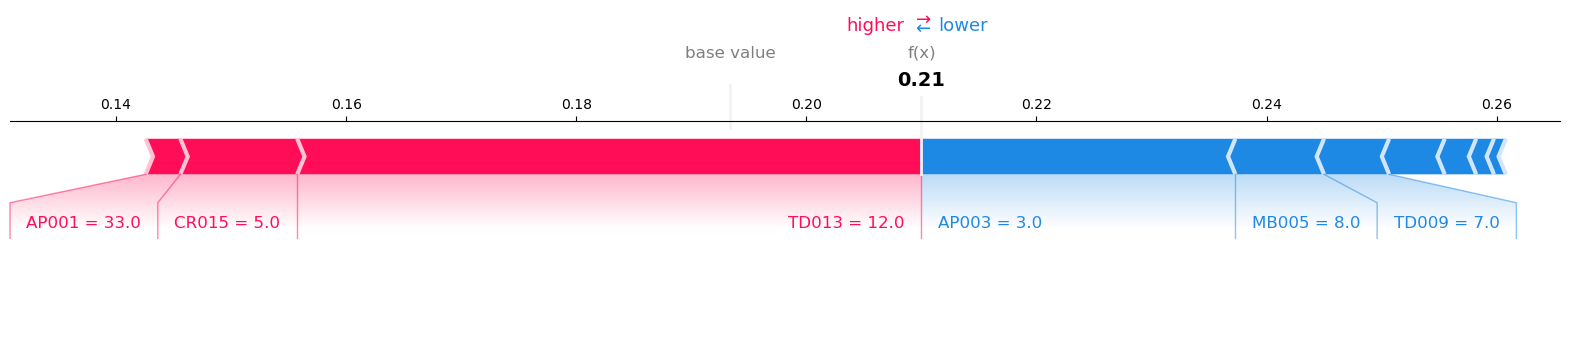

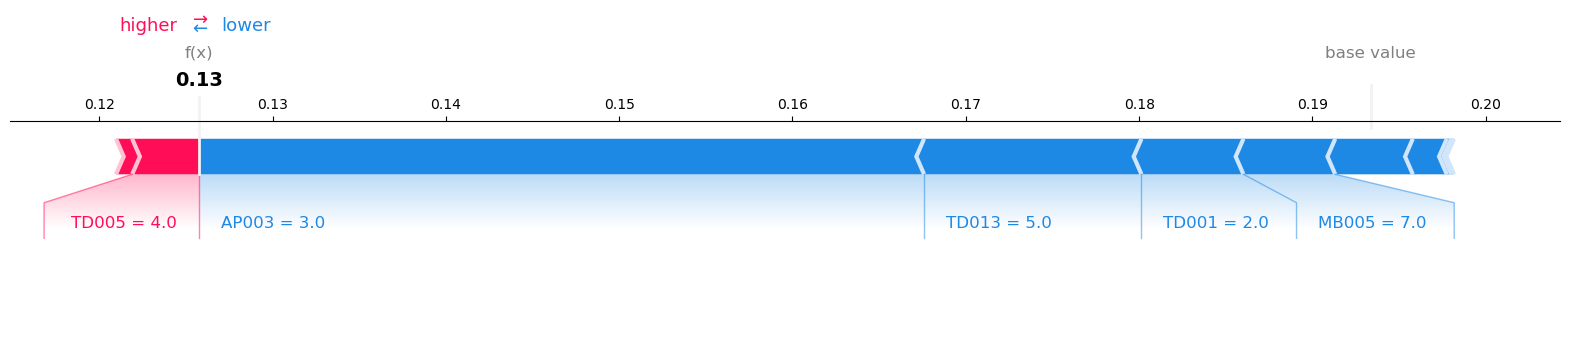

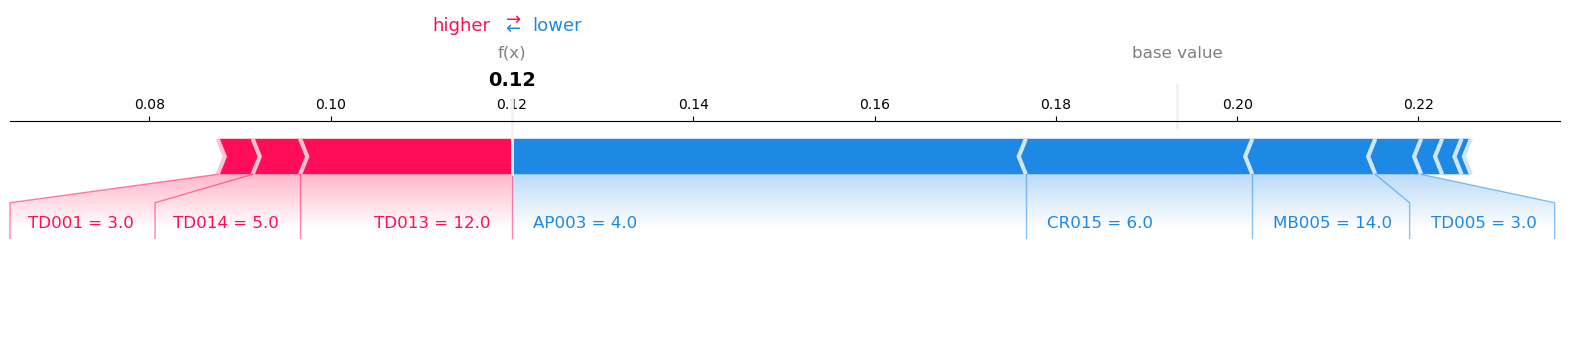

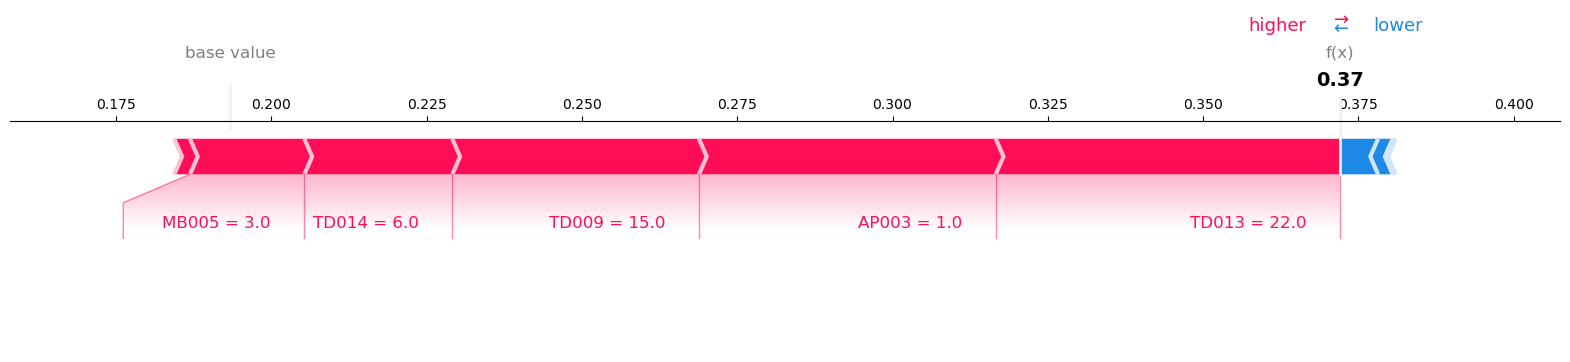

In [23]:
# Interpret Observation 1-4
sample_indices = [0, 1, 2, 3]

for index in sample_indices:
    shap_plot(index)

In [27]:
test.mean()

Unnamed: 0.1    40192.397250
Unnamed: 0      40193.397250
id              40193.397250
loan_default        0.196875
AP001              31.753438
                    ...     
CD169            1736.279063
CD170            1548.514437
CD172            2515.474375
CD173            2240.508125
MB005               5.974125
Length: 78, dtype: float64

In [28]:
train.mean()

Unnamed: 0.1    39951.275687
Unnamed: 0      39952.275687
id              39952.275687
loan_default        0.192781
AP001              31.695281
                    ...     
CD169            1727.571984
CD170            1533.054797
CD172            2506.948172
CD173            2221.489453
MB005               5.934203
Length: 78, dtype: float64

# Interpretation for Force Plot
1. The output value is the prediction for that observation (the prediction of the first row in first force plot is 0.21).
2. The base value: The original paper explains that the base value E(y_hat) is “the value that would be predicted if we did not know any features for the current output.” In other words, it is the mean prediction, or mean(yhat). The base value for first force plot is approximately 0.195. This is because the mean prediction of Y_test is 0.195. we can test it out by test.mean() which produces 0.195.
3. Red/blue: Features that push the prediction higher (to the right) are shown in red, and those pushing the prediction lower are in blue.
4. TD013: has a positive impact on AP003. The AP003 is 12 (as shown in the first row of Observation table) which is higher than the average value 3. So it pushes the prediction to the right.
5. CR015: has a positive impact on the AP003. A higher than the average value (=5 > 3) drives the prediction to the right.
6. AP001: has a positive impact on the AP003. A higher than the average value (=33 > 3) drives the prediction to the right.


/Users/vickyma/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/vickyma/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


OptionError: "No such keys(s): 'mode.use_inf_as_null'"

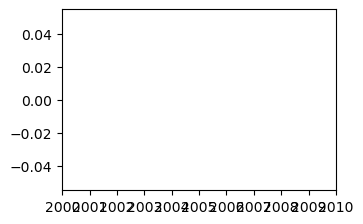

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data (replace this with your actual dataset)
data = {
    'Date': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04'],
    'Financial_Health_Index': [80, 85, 78, 90],
    'Machine_Utilization_Rate': [75, 80, 85, 70],
    'Insurance_Claims': [20, 18, 25, 22],
    'Credit_Card_Transactions': [1000, 1200, 950, 1100],
    'Fraud_Detection_Rate': [2, 3, 1, 2],
    'Market_Risk_Index': [15, 18, 12, 20],
    'Machine_Maintenance_Alerts': [3, 2, 4, 1],
    'Insurance_Policy_Compliance': [95, 96, 94, 97],
    'Authorization_Success_Rate': [98, 97, 99, 96],
    'Operational_Efficiency_Score': [85, 88, 82, 90],
}

df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Plotting the charts
plt.figure(figsize=(12, 8))

# Financial Health Index
plt.subplot(3, 3, 1)
sns.lineplot(data=df['Financial_Health_Index'])
plt.title('Financial Health Index')

# Machine Utilization Rate
plt.subplot(3, 3, 2)
sns.lineplot(data=df['Machine_Utilization_Rate'])
plt.title('Machine Utilization Rate')

# Insurance Claims Trend
plt.subplot(3, 3, 3)
sns.lineplot(data=df['Insurance_Claims'])
plt.title('Insurance Claims Trend')

# Credit Card Transaction Volume
plt.subplot(3, 3, 4)
sns.lineplot(data=df['Credit_Card_Transactions'])
plt.title('Credit Card Transaction Volume')

# Fraud Detection Rate
plt.subplot(3, 3, 5)
sns.lineplot(data=df['Fraud_Detection_Rate'])
plt.title('Fraud Detection Rate')

# Market Risk Index
plt.subplot(3, 3, 6)
sns.lineplot(data=df['Market_Risk_Index'])
plt.title('Market Risk Index')

# Machine Maintenance Alerts
plt.subplot(3, 3, 7)
sns.lineplot(data=df['Machine_Maintenance_Alerts'])
plt.title('Machine Maintenance Alerts')

# Insurance Policy Compliance
plt.subplot(3, 3, 8)
sns.lineplot(data=df['Insurance_Policy_Compliance'])
plt.title('Insurance Policy Compliance')

# Credit Card Authorization Success Rate
plt.subplot(3, 3, 9)
sns.lineplot(data=df['Authorization_Success_Rate'])
plt.title('Credit Card Authorization Success Rate')

# Operational Efficiency Score
plt.subplot(3, 3, 10)
sns.lineplot(data=df['Operational_Efficiency_Score'])
plt.title('Operational Efficiency Score')

plt.tight_layout()
plt.show()
